# To facilitate machine learning with [Bokeh](http://bokeh.pydata.org/en/latest/) visualizations, I show how to render images of the NIST digits dataset in Bokeh using: [`bokeh.plotting.figure.image_rgba`](https://github.com/bokeh/bokeh/blob/master/bokeh/plotting/figure.py#L305-L310)

Unfortunately, plotting the digits in Bokeh is not as simple as it is using Matplotlib's [`imshow`](http://matplotlib.org/users/image_tutorial.html).  However, I show here that while it does require manipulating the images, this can be done relatively easily.

In [1]:
import numpy as np

In [2]:
import bokeh.io
bokeh.io.output_notebook()

Loading BokehJS ...

In [3]:
import bokeh.plotting
import bokeh.layouts

In [4]:
import sklearn.datasets

## Getting started with using RGBA images
Wiki link on [RGBA_color_space](https://en.wikipedia.org/wiki/RGBA_color_space).  The key take-home is that each pixel is composed of a red, green, blue, and alpha value between 0 and 255.  Note that the order of these pixel values is represented in the image name, RGBA.  This use of 4 integer values ranging from 0 to 255 coresponds to a each pixel being represented by a 32-bit integers, each composed of 4 8-bit integers.  Here we demonstrate this.

In [16]:
N = 8
img = np.zeros((N,N), dtype=np.uint32)  # create an NxN image, each pixel with 32-bits
view = img.view(dtype=np.uint8).reshape((N, N, 4))  # break each of the pixels into 4 8-bit definitions

# create a column of red pixels
view[:, 0, 0] = 255 

# create a column of blue pixels
view[:, 2, 2] = 255

# create a column of green pixels
view[:, 4, 1] = 255

# create a column of white pixels
view[:, 6, :] = 255

# make all pixels fully visible (no alpha)
view[:, :, 3] = 255

p = bokeh.plotting.figure(width=400, height=400, x_range=(0,10), y_range=(0,10))

# must give a vector of images
p.image_rgba(image=[img], x=0, y=0, dw=10, dh=10)

bokeh.plotting.show(p)

Now lets combine this with it's transpose, giving rows and columns of color.

In [17]:
N = 8
img = np.zeros((N,N), dtype=np.uint32)  # create an NxN image, each pixel with 32-bits
view = img.view(dtype=np.uint8).reshape((N, N, 4))  # break each of the pixels into 4 8-bit definitions

view[:, :, 3] = 255  # make all pixels fully visible (no alpha)

# setup the columns
view[:, 0, 0] = 255  # create a column of red pixels
view[:, 2, 2] = 255  # create a column of blue pixels
view[:, 4, 1] = 255  # create a column of green pixels
view[:, 6, :] = 255  # create a column of white pixels

# setup the rows
view[0, :, 0] = 255  # create a column of red pixels
view[2, :, 2] = 255  # create a column of blue pixels
view[4, :, 1] = 255  # create a column of green pixels
view[6, :, :] = 255  # create a column of white pixels

p = bokeh.plotting.figure(width=400, height=400, x_range=(0,10), y_range=(0,10))

# must give a vector of images
p.image_rgba(image=[img], x=0, y=0, dw=10, dh=10)

bokeh.plotting.show(p)

## Now lets plot some of the NIST digits.

To convert the 4-bit pixels used in digits, ranging from 0 to 16, we must rescale the values to go from 0 to 255 and apply the values to each of the RGB values.  We set the alpha values to 255 to indicate all pixels should be visible (one might easily change completely white pixels to be transparent).

In [7]:
def rgba_from_4bit(img_4):
    n, m = img_4.shape
    img_rgba = np.empty((n, m), dtype=np.uint32)
    view = img_rgba.view(dtype=np.uint8).reshape((n, m, 4))
    view[:, :, 3] = 255  # set all alpha values to fully visible
    rgba = 255 - img_4[:, :] / 16 * 255
    
    # rgba is upside-down, hence the ::-1
    view[:, :, 0] = view[:, :, 1] = view[:, :, 2] = rgba[::-1]
    
    return img_rgba

In [8]:
digits = sklearn.datasets.load_digits()

In [9]:
# some information about the data
digits.DESCR

"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

In [10]:
p = bokeh.plotting.figure(width=110, height=100, x_range=(0, 8), y_range=(0, 8),
                          tools='', title='Training: {}'.format(digits.target[0]))
p.xaxis.visible = p.yaxis.visible = False

p.image_rgba(image=[rgba_from_4bit(digits.images[0])], x=0, y=0, dw=8, dh=8)

bokeh.plotting.show(p)

In [11]:
images_and_labels = list(zip(digits.images, digits.target))

In [12]:
n_plot = 4
plots = []
w = 80
h = 80

for index, (image, label) in enumerate(images_and_labels[:n_plot]):
    img_rgba = rgba_from_4bit(image)
    p = bokeh.plotting.figure(width=w, height=h, tools='', 
                              x_range=(0, 8), y_range=(0, 8),
                              title='Training: {}'.format(label))
    p.xaxis.visible = p.yaxis.visible = False
    p.image_rgba(image=[img_rgba], x=0, y=0, dw=8, dh=8)
    plots.append(p)

grid = bokeh.layouts.gridplot([plots])
bokeh.plotting.show(grid)

## Compared to matplotlib

In [13]:
import matplotlib.pyplot as plt

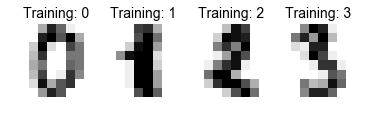

In [14]:
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()

## Conclusions
Yes, it required a bit more code to convert the 16 bit images into RGBA images, but this conversion amounted to less than 10 lines of code.  

## Remaining to do list:
1. Fix the aspect ratio of the pixels to be equal (related [bokeh GitHub Issue](https://github.com/bokeh/bokeh/issues/474))